## Some Information Theory background

$$
\begin{array}{|l|l|l|l|}
\hline
(a) & \text{Information/surprisal carried by event x} & \text{I}_{p}\,(x) & - \log_{2} p\,(x) \\
(b) & \text{Entropy of distribution p} & \text{H}(p) & \sum\limits_{x} \, -p\,(x) \log_{2} p\,(x)\\
    & \text{Expected information under p} &          &\sum\limits_{x\in \chi}  p\,(x) \, \text{I}_{p}\,(x) \\ 
(c) & \text{Excess surprisal replacing p with q} & \Delta_{p,q}(x) & \log_{2} \frac{p\,(x)}{q\,(x)}\\
    &                         &                         & \log_{2}  p\,(x) - \log_{2}  q\,(x)  \\
    &                         &                         & \text{I}_{q}\,(x) - \text{I}_{p}\,(x)\\
(d) & \text{KL Divergence of q from p}   & \text{D}_{\text{KL}}(p\mid\mid q) & \sum\limits_{x} \, p\,(x) \,\Delta_{p,q}\,(x) \\
\hline
    \end{array}
$$
The entropy of $p$ is equivalent to Expected information (or surprisal) under $p$.
Ther KL Divergence of $q$ from $p$ is equivalent to expected probability ratio 
of p to q or the expected excess surprisal when replacing p with q.
It can be thought of as the distance of q from p, but it's better
to call it the **divergence** of $q$ from $p$, because it's not symmetric;
its official name is **Kullback-Leibler Divergence**;  it is also called
**Relative Entropy** and **I-Divergence**.

Example A reindeer race.  Suppose a racing handicapper $p$ rates the reindeer as follows:

$$
\begin{array}{l|rrc}
               & p(x) & \text{Odds} &\text{I}_{p}(x) \\
               \hline
\text{Prancer} & 1/4 & 3:1 & 2\\
\text{Blitzen} & 1/4 & 3:1 & 2 \\
\text{Dancer} & 1/8 & 7:1 &3  \\
\text{Dasher} & 1/8  & 7:1 &3  \\
\text{Donner} & 1/16 & 15:1 & 4 \\
\text{Vixen}& 1/16  & 15:1 & 4\\
\text{Comet}& 1/16  & 15:1 & 4 \\
\text{Cupid}& 1/16  & 15:1 &4\\
\end{array}
$$

The unit for $\text{I}_{p}(x)$ is **bits**.  The intuition is that if one of the favorites -- say Prancer -- wins
that carries less surprisal (2 bits) than if one of the long shots wins (4 bits). Now for the entropy calculation
(computing the average amount of surprise):


$$
\begin{array}{lcl}
\text{H}(p) & = & - \,\lbrack\,2 \cdot 1/4\cdot\log\,1/4 \,+\, 2\cdot 1/8\cdot\log\, 1/8\, +\, 4 \cdot 1/16\cdot \log\, 1/16\,\rbrack\\
            & = & - \,\lbrack\,2 \cdot 1/4\cdot (-2) \,+\, 2\cdot 1/8\cdot (-3)\, +\, 4 \cdot 1/16\cdot (-4)\,\rbrack\\
            &=&  - \,\lbrack\,2 \cdot (-1/2)\, + \, 2 \cdot (-3/8) \, +\, 4 \cdot (-1/4)\,\rbrack\\
            &=& - \,\lbrack \,-1 \,+ \,-3/4 \,+ \,-1\,\rbrack \\
            &=& 2.75 \text{ bits}
\end{array}
$$ 


Suppose racing expert q tells we have complete parity: All the reindeer are equally likely to win:

$$
\begin{array}{lcl}
H(q) & = & -\, \lbrack\, 8 \cdot 1/8 \cdot \log_{2} 1/8 \,\rbrack\\
     & = & 3 \text{ bits}
\end{array}
$$ 

The **uniform distribution** is always the **maximum entropy** distribution over any given
sample space.  It represents the case in which our expert has no relevant information
distinguishing any of the horses.  He won't stay in business long if he keeps doing this.

In [2]:
import numpy as np
log2 = np.log(2)


def dist (p):
    """
    A test that this is a valid probability distribution.
    
    The == here should be replaced with close to (up to a tolerance).
    """
    return ((p>=0) & (p <=1)).all() and p.sum() ==1

def H (p):
    """
    p is a 1D array representing a valid probability distribution.
    
    Return the entropy of p.
    """
    assert dist(p), "p must be a valid probability distribution!"
    I = - np.log(p)
    # np.log is natural log; convert to bits
    return (p * I).sum()/log2

p = np.array([.25,.25,.125,.125,.0625,.0625,.0625,.0625,])
print(dist(p))
H(p)

True


np.float64(2.75)

## Cross-entropy (Model evaluation)

We're interesting in evaluating various models of the world with respect to the
**truth**.  Or maybe -- to make it sound like this is a **doable** thing --
in evaluating various models with respect to the accuracy of the predications they make.
Since models are often used to assign probabilities to things, **Information Theory**
can be of help.

The original definition of information-theoretic definition of cross-entropy comes 
from (Shannon and Weaver), where it
used as measure of the expected amount of surprise if probability distribution $\hat{y}$ is used in place
of $y$.  

$$
%\begin{array}{lcl}
\text{H}\,(\hat{y},\,y)=\text{CE}\,(\hat{y},\,y) =  - \sum\limits_{x \in \chi}  y\,[x] \log \hat{y}\,[x]\\
%\end{array}
$$

So in our model evaluation task,  we can think of $y$ as "the truth" and
$\hat{y}$ as our model's estimate of the truth, and $\text{CE}\,(\hat{y},\,y)$
weights the surprise-value of each $x$ (as given by $\hat{y}$) with its true probability
(as given by $y$).

From which it follows that

$$
 \text{CE}\,(\hat{y},\,y)=               \sum\limits_{x \in \chi}  y\,[x] \,\text{I}_{\hat{y}} [x]\\
%                       &=& \text{I}\,(y) + \text{D}_{\text{KL}}(\hat{y}\mid\mid y) 
$$

or the expectation (according to $y$) of the information assigned by $\hat{y}$.  And it is an interesting
exercise to show that 

$$
\text{CE}\,(\hat{y},\,y)= \text{H}(y) +  \text{D}_{\text{KL}}(\hat{y} \mid\mid y) 
$$

That is, the cross entropy is the sum of of the entropy of $y$ and the divergence
of $\hat{y}$ from $y$.  Since entropy and divergence are always non-negative,
that means the cross-entropy of $y$ with any other distribution is
always strictly greater than the entropy of $y$. That makes sense:
modeling the true distribution $y$ with any other distribution ought
generate more surprises.

In LLM pre-training we concentrate on predicting the **next** word
given all the previous words. We are going to use **cross-entropy** as our loss
function.  But what do we use for $y$ (the correct distribution)?  We use the data
itself. We assume the correct distribution has perfect knowledge of what
the next word is given the context of all the previous words, so
for any given word $w$ in its context, $y[w]=1$. Therefore,
all the terms in the sum above are 0 except for the term for the actual next word,
and we can write the cross entropy (which we'll call
$\text{Loss}_{\text{CE}}$) as:

$$
\text{Loss}_{\text{CE}}\,(\hat{y}_{t},\,y_{t}) =   \log \hat{y}\,[w_{t+1}]
$$

For example, suppose at word position $t$, $\hat{y}\,[w_{t+1}] = .25$ (the model assigns the
next word a probability of 1/4).  Then the loss is:

$$
-\,\log_{2}(1/4) = - (-2) = 2
$$

On the other hand, suppose it is 3/8:

$$
-\,\log_{2}(3/8) \approx - (-1.415) = 1.415
$$

So the higher the probability the model assigns to the next word, the less the loss. To achieve a loss
of 0 it must assign to each succeeding word a probability of 1.

##  Exercises

**Exc 1**.  Compute the entropy of the distribution of heads and tails for a fair coin (p(h)=.5
    and p(t) = .5). [H(p) = 1] **Done for you.**

**Exc 2**. Compute the entropy of the distribution of heads and Tails for a biased coin (p(h)=.75).
    [H(p) $\approx$ .811]  **Done for you.**


In [172]:
#Exc 1 code H defined above
H(np.array([.5,.5]))

np.float64(1.0)

In [170]:
#Exc 2 code
H(np.array([.75,.25]))

np.float64(0.8112781244591328)

**Exc 3a.** Plot H(p) for coins ranging from p(H)=0 to p(H) =1. The plotting code is easy. What's more interesting is producing the x- and y-values you are going to plot. Approach this as an exercise in array programming.  Produce an array of probability distributions.  Apply H to that array using `np.apply_along_axis` to get a 1D array of H-values.

**Exc 3b.**  Where is the maximum value for H(p)?

[Place an answer to 3b) here.]

##  Your plotting code answer (3a) goes in the code cell below

Text(0.5, 1.0, 'H(x)')

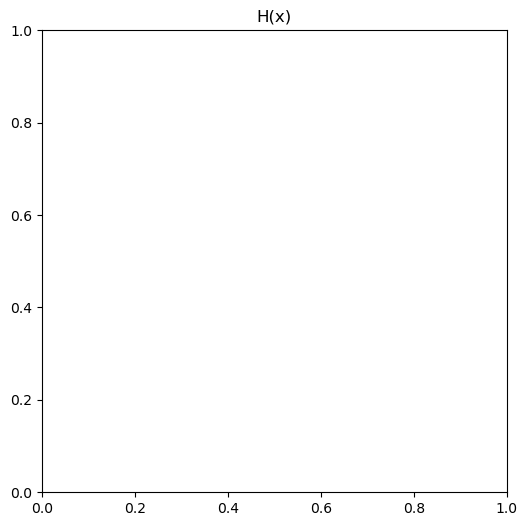

In [1]:
from matplotlib import pyplot as plt
(fig, ax ) = plt.subplots(1,1,figsize=(6,6))
ax.set_title("H(x)")

## A block of plotting code here

4.  Write a python function that computes KL-Divergence.  Compute the divergence of expert $q$ from 
    expert $p$ in the reindeer handicapping example above (that is, $q$ is the "model" and $p$ is the truth).

In [4]:
import numpy as np
log2 = np.log(2)

def KLD (p,q):
    assert dist(p), "p must be a valid probability distribution!"
    assert dist(q), "q must be a valid probability distribution!"
    # Your code here
    pass

p = np.array([.25,.25,.125,.125,.0625,.0625,.0625,.0625,])
q = np.ones((8,))*(1/8)
#KLD(p,q)


5.  Write a python function that computes Cross entropy.  Compute the cross entropy of expert $q$ from 
    expert $p$ in the reindeer handicapping example above.

In [176]:
def CE (p,q):
    assert dist(p), "p must be a valid probability distribution!"
    assert dist(q), "q must be a valid probability distribution!"
    # Your code here
    pass

print(CE(p,q))

3.0
3.0
